# Procesiranje slik za meritve v strukturni dinamiki

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Slikovne-meritve" data-toc-modified-id="Slikovne-meritve-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Slikovne meritve</a></span><ul class="toc-item"><li><span><a href="#Parametri-zajema" data-toc-modified-id="Parametri-zajema-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Parametri zajema</a></span></li><li><span><a href="#Osvetlitev" data-toc-modified-id="Osvetlitev-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Osvetlitev</a></span></li><li><span><a href="#Priprava-površine-merjenca" data-toc-modified-id="Priprava-površine-merjenca-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Priprava površine merjenca</a></span></li><li><span><a href="#Pogoste-težave-pri-slikovnih-meritvah" data-toc-modified-id="Pogoste-težave-pri-slikovnih-meritvah-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Pogoste težave pri slikovnih meritvah</a></span><ul class="toc-item"><li><span><a href="#Neustrezno-izostrena-slika" data-toc-modified-id="Neustrezno-izostrena-slika-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Neustrezno izostrena slika</a></span></li><li><span><a href="#Neustrezna-osvetlitev" data-toc-modified-id="Neustrezna-osvetlitev-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Neustrezna osvetlitev</a></span></li></ul></li></ul></li><li><span><a href="#Določitev-pomikov-na-slikah-z-metodo-optičnega-toka-(Simplified-Optical-Flow)" data-toc-modified-id="Določitev-pomikov-na-slikah-z-metodo-optičnega-toka-(Simplified-Optical-Flow)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Določitev pomikov na slikah z metodo optičnega toka (<em>Simplified Optical Flow</em>)</a></span></li><li><span><a href="#Metoda-Lucas-Kanade:" data-toc-modified-id="Metoda-Lucas-Kanade:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Metoda Lucas-Kanade:</a></span></li><li><span><a href="#Izračun-FRF" data-toc-modified-id="Izračun-FRF-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Izračun FRF</a></span></li><li><span><a href="#Eskperimentalna-modalna-analiza-(samo-slikovn-meritev):" data-toc-modified-id="Eskperimentalna-modalna-analiza-(samo-slikovn-meritev):-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Eskperimentalna modalna analiza (samo slikovn meritev):</a></span></li><li><span><a href="#Eskperimentalna-modalna-analiza---hibridna-metoda" data-toc-modified-id="Eskperimentalna-modalna-analiza---hibridna-metoda-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Eskperimentalna modalna analiza - hibridna metoda</a></span></li></ul></div>

Vsi potrebni paketi so navedeni v `requirements.txt`:
* ``pip install -m requirements.txt``

Priprava paketov in nekaterih funkcij:

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from orodja import plot_mode_shape
from ipywidgets import interact

import lvm_read
import pyidi
import pyEMA
from sdypy import FRF as  pyFRF

C:\Users\Domen\AppData\Local\Programs\Python\Python312\Lib\copy.py:151: DeprecationWarning: Pickle, copy, and deepcopy support will be removed from itertools in Python 3.14.
  rv = reductor(4)
C:\Users\Domen\AppData\Local\Programs\Python\Python312\Lib\copy.py:261: DeprecationWarning: Pickle, copy, and deepcopy support will be removed from itertools in Python 3.14.
  y.__setstate__(state)
d:\pedagoško\_Procesiranje signalov\_VAJE\_PREDLOGE\Predavanje 12 - Procesiranje slik\venv\Lib\site-packages\pyEMA\__init__.py:12: UserWarning: This is the last version of pyEMA and will not longer be maintained since it is moving to the SDyPy package. To use the latest code from SDyPy: `pip install sdypy` and `from sdypy import EMA`.
  warnings.warn('This is the last version of pyEMA and will not longer be maintained since it is moving to the SDyPy package. To use the latest code from SDyPy: `pip install sdypy` and `from sdypy import EMA`.')


## Slikovne meritve

**Postavitev eksperimenta:**

<img src="figures/experiment_setup.jpg" width="80%">

**Vzbujanje z modalnim kladivom:**

<video controls loop src="figures/experiment.mp4" width="100%" rotate="270deg"/>

Datoteke s slikami:

In [3]:
cam_fname = 'data/camera.cih'
lvm_fname = 'data/acceleration.lvm'

Odpiranje posnetka s paketom [pyidi][1]:

[1]: https://github.com/ladisk/pyidi

In [4]:
video = pyidi.pyIDI(cam_fname)

d:\pedagoško\_Procesiranje signalov\_VAJE\_PREDLOGE\Predavanje 12 - Procesiranje slik\venv\Lib\site-packages\pyMRAW.py:92: UserWarning: Not 12bit (8 bits)! clipped values?
  warnings.warn('Not 12bit ({:g} bits)! clipped values?'.format(bits))
d:\pedagoško\_Procesiranje signalov\_VAJE\_PREDLOGE\Predavanje 12 - Procesiranje slik\venv\Lib\site-packages\pyMRAW.py:104: UserWarning: Clipped footage! (Total frame: 3750, Original total frame: 7500)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


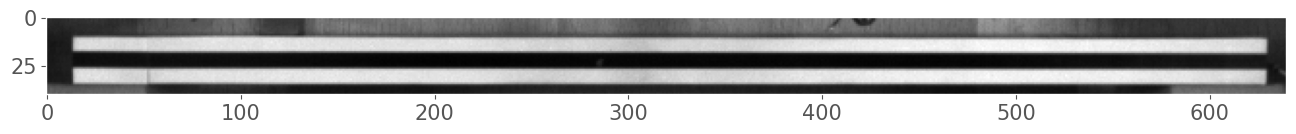

In [5]:
sequential_image_nr = 200
plt.figure()
plt.imshow(video.reader.mraw[sequential_image_nr], cmap='gray')
plt.grid(False)
plt.show()

*Posnetek je prilagojen prikazu in je zato slabše kavlaitete. Za natančne meritve običajno zajamemo zelo veliko količino podatkov.*

<video controls loop src="figures/video.MOV" width="950" rotate="270deg"/>

### Parametri zajema

Parametri nastavitve kamere so zapisani v atributu `info`:

In [6]:
video.info

{'Date': '2018/12/17',
 'Time': '12:48',
 'Camera Type': 'FASTCAM SA-Z type 2100K-M-64GB',
 'Head Type': 'Unknown Child Device',
 'Camera ID': 11,
 'Camera Number': 0,
 'Head Number': 1,
 'Max Head Number': 1,
 'Scene Name': '',
 'User Defined Camera Name': '',
 'Session Number': '',
 'Date Record': 'Unknown',
 'Time Record': 'Unknown',
 'Trigger Time': 0,
 'Record Rate(fps)': 15000,
 'Shutter Speed(s)': '1/15371',
 'Trigger Mode': 'Start',
 'Original Total Frame': 7500,
 'Total Frame': 3750,
 'Start Frame': 0,
 'Correct Trigger Frame': 0,
 'Save Step': 1,
 'Image Width': 640,
 'Image Height': 40,
 'Color Type': 'Mono',
 'Color Bit': 8,
 'File Format': 'MRaw',
 'EffectiveBit Depth': 12,
 'EffectiveBit Side': 'Higher',
 'Digits Of File Number': 6,
 'Device Last Error': '-1:0xffffffff',
 'Comment Text': '',
 'AnalogBoard Channel Num': 0,
 'Zero Frame': 'Exist',
 'Shutter Type2(nsec)': 65060,
 'Edge Enhance': 0,
 'Pre LUT Mode': 'DEF1',
 'Pre LUT Brightness': 0,
 'Pre LUT Contrast': 0,
 '

### Osvetlitev

Ustrezna osvetlitev je eden najpomembnejših parametrov pri zajemu slik s hitro kamero.

Pri oceni ustreznosti osvetlitve si lahko pomagamo s hitrogramom sivinskih vrendosti:

d:\pedagoško\_Procesiranje signalov\_VAJE\_PREDLOGE\Predavanje 12 - Procesiranje slik\venv\Lib\site-packages\pyidi\pyidi.py:268: DeprecationWarning: `self.mraw` is deprecated and will be removed in the next version. Please use `self.reader.mraw` instead.
  warnings.warn('`self.mraw` is deprecated and will be removed in the next version. Please use `self.reader.mraw` instead.', DeprecationWarning)


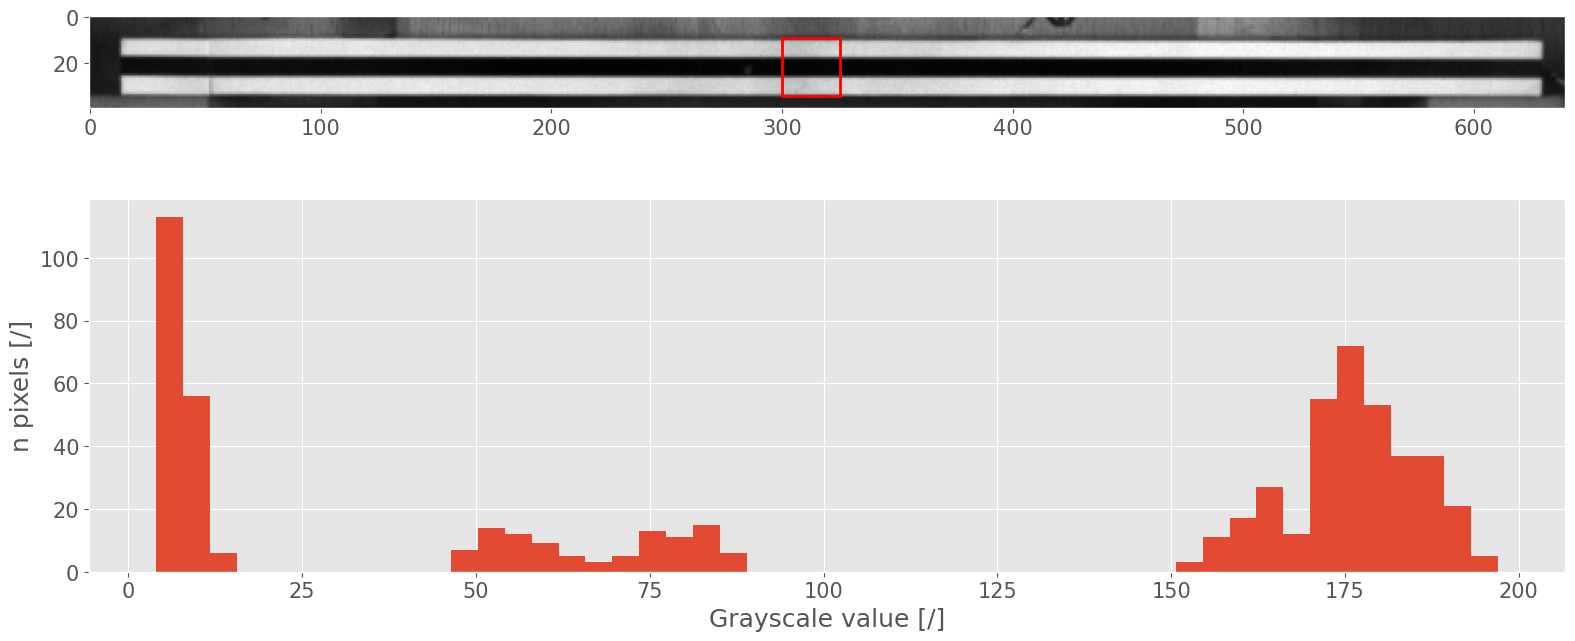

In [7]:
selected_frame = 0
x0 = 300 # position of observed rectangle
y0 = 9
d = 25
roi = video.mraw[selected_frame, y0:y0+d, x0:x0+d]

fig, ax = plt.subplots(2)
ax[0].imshow(video.mraw[selected_frame], cmap='gray')
ax[1].hist(roi.flatten(), bins=50);
# Formating
ax[0].add_patch(patches.Rectangle((x0, y0), d, d, fill=False, color='r', linewidth=2))
ax[0].grid(False)
ax[1].set_xlabel('Grayscale value [/]')
ax[1].set_ylabel('n pixels [/]')
plt.tight_layout()

### Priprava površine merjenca

Za delovanje metod določanja pomikov s slik na osnovi gradientov sivinskih vrendosti je nujno, da je površina merjenca ustrezno pripravljena. 

Pogosto na opazovano površino apliciramo visokokontrasntni vzorec pack (*speckle*) ali črt. Identifikacija pomikov je najzaneslivejša v smeri gradienta sivinskih vrendosti.

In [8]:
grad0, grad1 = np.gradient(video.mraw[0].astype(float)) # gradient computation

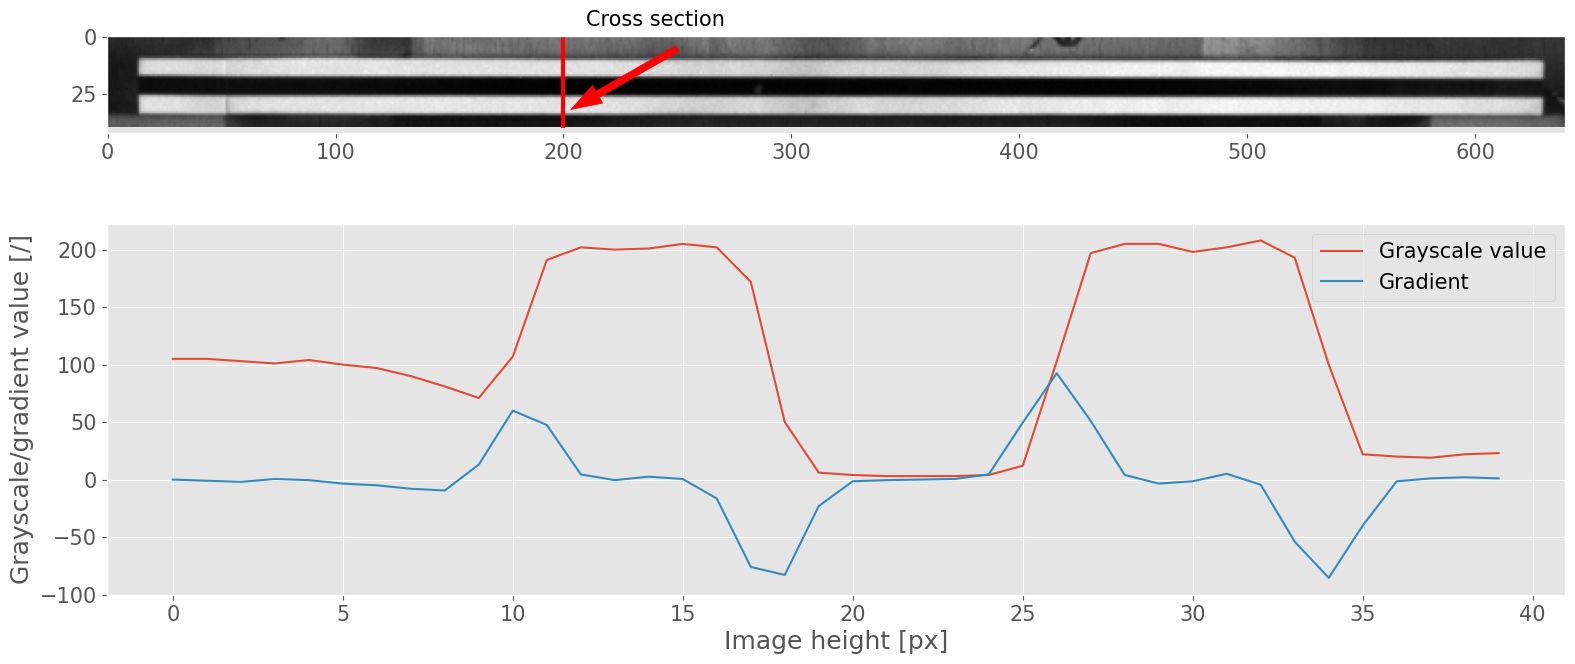

In [9]:
x0 = 200 # position of cross section

fig, ax = plt.subplots(2)
ax[0].imshow(video.mraw[selected_frame], cmap='gray')
ax[1].plot(video.mraw[selected_frame, :, x0], label='Grayscale value')
ax[1].plot(grad0[:, x0], label='Gradient')
# Formating
ax[0].vlines(x0, 0, 40, colors='r', linewidth=3)
ax[0].text(x0+10, -5, 'Cross section')
ax[0].arrow(x0+50, 5, -35, 20, color='r', width=3)
ax[0].grid(False)
ax[1].set_xlabel('Image height [px]')
ax[1].set_ylabel('Grayscale/gradient value [/]')
plt.legend()
plt.tight_layout()

### Pogoste težave pri slikovnih meritvah

#### Neustrezno izostrena slika

In [10]:
layout_fname = r'data/focus.cih'
video_layout = pyidi.pyIDI(layout_fname)

d:\pedagoško\_Procesiranje signalov\_VAJE\_PREDLOGE\Predavanje 12 - Procesiranje slik\venv\Lib\site-packages\pyMRAW.py:104: UserWarning: Clipped footage! (Total frame: 1, Original total frame: 44)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


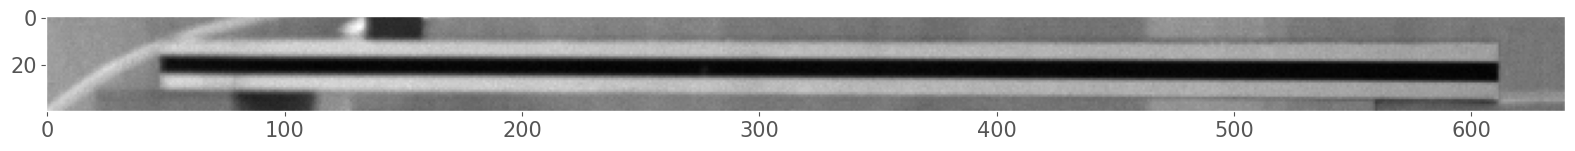

In [11]:
fig, ax = plt.subplots()
ax.imshow(video_layout.reader.mraw[0], 'gray')

# Formating
ax.grid(False)
plt.tight_layout()

#### Neustrezna osvetlitev

In [12]:
light_fname = r'data/illumination.cih'
video_light = pyidi.pyIDI(light_fname)

d:\pedagoško\_Procesiranje signalov\_VAJE\_PREDLOGE\Predavanje 12 - Procesiranje slik\venv\Lib\site-packages\pyMRAW.py:104: UserWarning: Clipped footage! (Total frame: 1, Original total frame: 34)
  warnings.warn('Clipped footage! (Total frame: {}, Original total frame: {})'.format(cih['Total Frame'], cih['Original Total Frame'] ))


d:\pedagoško\_Procesiranje signalov\_VAJE\_PREDLOGE\Predavanje 12 - Procesiranje slik\venv\Lib\site-packages\ipywidgets\widgets\interaction.py:43: DeprecationWarning: `ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`
  from ipykernel.pylab.backend_inline import flush_figures


interactive(children=(IntSlider(value=500, description='x0', max=1500, min=-500), Output()), _dom_classes=('wi…

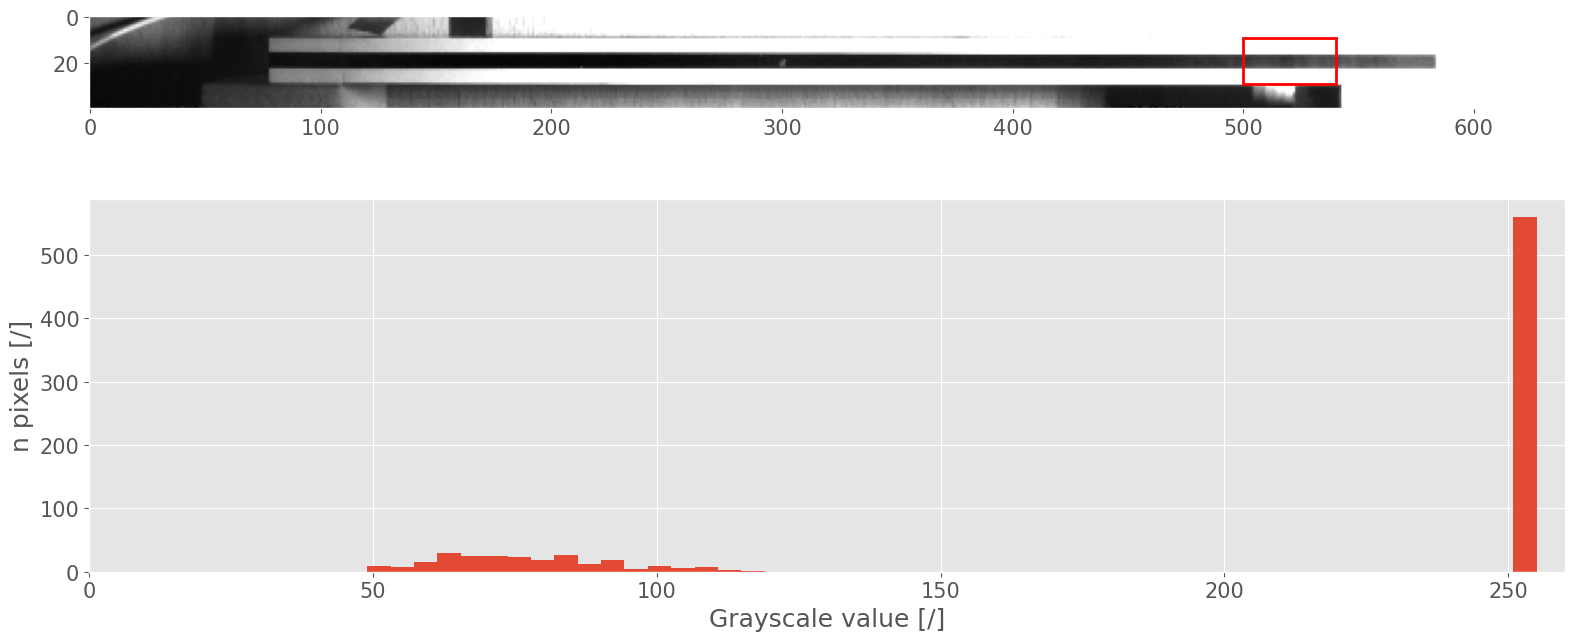

In [13]:
selected_frame = 0
y0, d = 9, 20

def show(x0):
    roi = video_light.reader.mraw[selected_frame, y0:y0+d, x0:x0+d*2]
    fig, ax = plt.subplots(2)
    ax[0].imshow(video_light.reader.mraw[selected_frame], cmap='gray')
    ax[1].hist(roi.flatten(), bins=50);
    # Formating
    ax[0].add_patch(patches.Rectangle((x0, y0), d*2, d, fill=False, color='r', linewidth=2))
    ax[0].grid(False)
    ax[1].set_xlabel('Grayscale value [/]')
    ax[1].set_ylabel('n pixels [/]')
    ax[1].set_xlim([0, 260])
    plt.tight_layout()
interact(show, x0=500);

---

## Določitev pomikov na slikah z metodo optičnega toka

Svetlost na sliki se ohranja:
$$
	f(x, y, t) = f(x + \Delta x, y + \Delta y, t+ \Delta t).
$$

Sledi enačba poenostavljene metode optičnega toka za posamezno točko na sliki:
$$
s(x_j,y_k,t)=\frac{f_0(x_j,y_k)-f(x_j,y_k,t)}{|\nabla f_0|}
$$

$s(x_j,y_k,t) \dots$ pomik točke v smeri lokalnega gadienta sivinskih vrednosti

([Javh et al][1])

[1]: http://lab.fs.uni-lj.si/ladisk/?what=abstract&ID=179

Računamo pomike glede na referenčno sliko:

In [14]:
reference_image = np.average(video.reader.mraw[:10], axis=0)

Potrebujemo slike gradienta v smeri ``x`` (1) in ``y`` (0):

In [15]:
grad0, grad1 = np.gradient(reference_image)

In [16]:
G = np.sqrt(grad0**2 + grad1**2)

Za obdelavo so primerne točke z visoko vrednostjo gradienta:

In [17]:
border = 20
border_h = 12
n = 2
N = 16
w = np.arange(border, reference_image.shape[1]-border, np.abs(border - reference_image.shape[1]-border)//N)
h = np.argsort(np.abs(grad0[border_h:-border_h, w]), axis=0)[-n:, :].T + border_h
inds = np.column_stack((h.flatten(), w.repeat(n)))

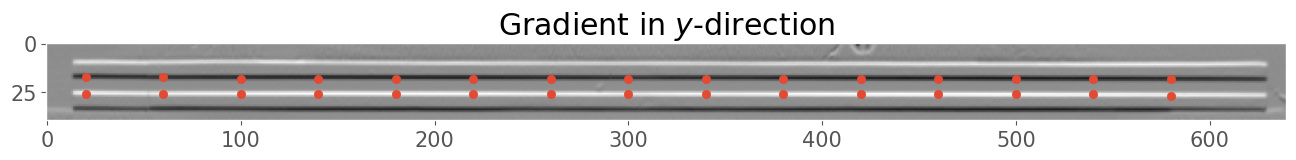

In [18]:
fig, ax = plt.subplots()
ax.imshow(grad0, cmap='gray')
ax.scatter(inds[:, 1], inds[:, 0])
ax.grid(False)
ax.set_title('Gradient in $y$-direction');

Enačba optičnega toka:

In [19]:
d_of = ((reference_image[inds.T[0], inds.T[1]] - video.reader.mraw[:, inds.T[0], inds.T[1]]) / np.abs(G[inds.T[0], inds.T[1]])).T
d_of.shape

(30, 3750)

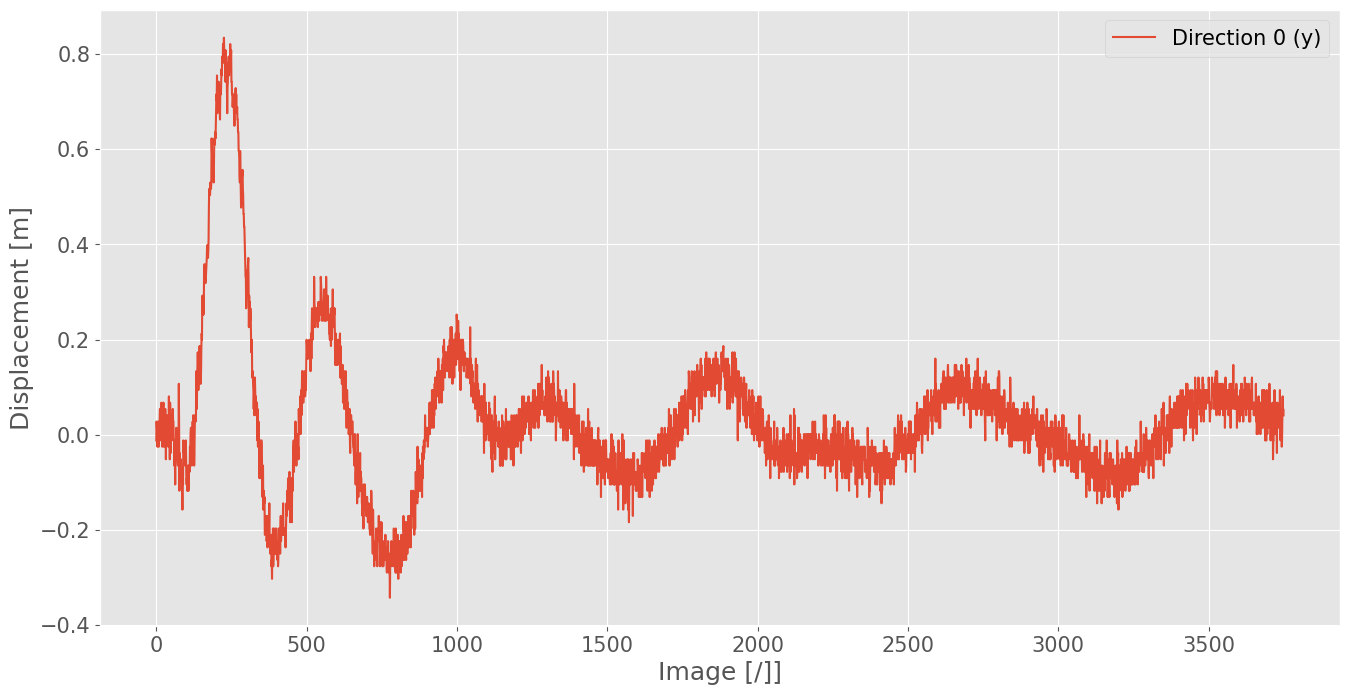

In [20]:
fig, ax = plt.subplots()
ax.plot(d_of[0], label='Direction 0 (y)');
ax.set_xlabel('Image [/]]')
ax.set_ylabel('Displacement [m]')
plt.legend()

Izračun pomikov s ``pyidi``:

In [21]:
video.set_points(points=inds) # izbira točk za analizo

In [22]:
video.set_method(method='sof',
                mean_n_neighbours=n)

Izračun pomikov z ``get_displacements()``:

In [23]:
displacements = video.get_displacements() * 8e-5

100%|█████████████████████████████████████████████████████████| 3750/3750 [00:03<00:00, 1096.40it/s]

Averaging...
Finished!



d:\pedagoško\_Procesiranje signalov\_VAJE\_PREDLOGE\Predavanje 12 - Procesiranje slik\venv\Lib\site-packages\pyidi\methods\_simplified_optical_flow.py:141: UserWarning: Displacement larger than 0.5 pixel
  warnings.warn('Displacement larger than 0.5 pixel')


In [24]:
location = 1

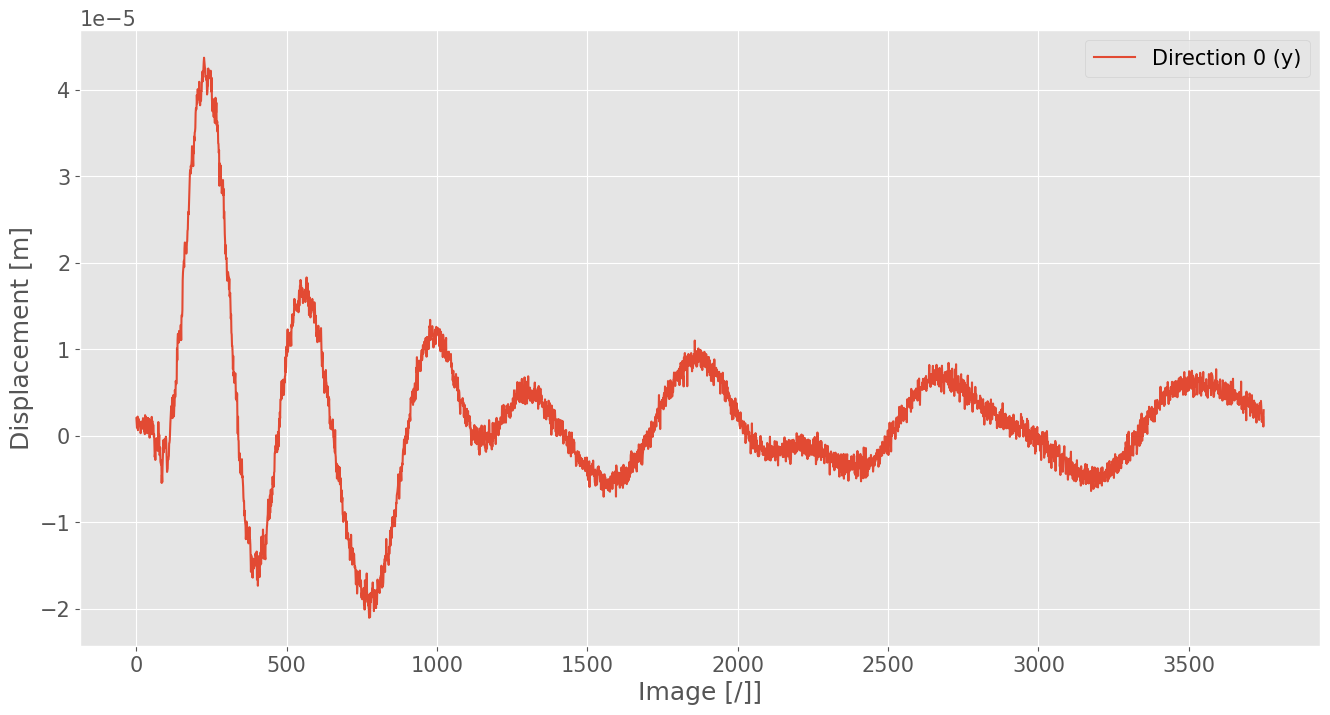

In [25]:
fig, ax = plt.subplots()
ax.plot(displacements[location, :, 0], label='Direction 0 (y)');
ax.set_xlabel('Image [/]]')
ax.set_ylabel('Displacement [m]')
plt.legend()

## Metoda Lucas-Kanade:

Če enačbe optičnega toka zapišemo za podobmočje več točk na sliki, dobimo predoločen sistem enačb.

Rešitev predoločenega sistema v smislu najmanjše kvadratične napake nam da pomik podobmočja:

$$
\begin{equation}
	\begin{bmatrix}
		\Delta x \\
		\Delta y
	\end{bmatrix} =
	\begin{bmatrix}
		\sum g_x^2 &\sum  g_x \, g_y \\
		\sum  g_x \, g_y &\sum g_y^2
	\end{bmatrix}^{-1}
	\begin{bmatrix}
		\sum g_x \, (f-g) \\
		\sum g_y \, (f-g)
	\end{bmatrix}
\end{equation}
$$


$f(\mathbf{x}) \dots$ trenutna (premaknjena) slika

$g(\mathbf{x}) \dots$ referenčna slika

Do enake rešitve pridemo, če rešim opzimizacijski problem, v katerem iščemo parametre $\Delta \mathbf{x}$, ki premaknjeno trenutno sliko $f(\mathbf{x} + \Delta \mathbf{x})$ poravnajo z referenčno $g(\mathbf{x})$:

$$
SSD(\Delta \mathbf{x}) = \sum\limits_{x, y} \big[f(\mathbf{x} + \Delta \mathbf{x}) - g(\mathbf{x})\big]^2.
$$


In [26]:
points_lk = np.column_stack([np.ones_like(w)*video.info['Image Height']//2, w])

In [27]:
video.set_points(points_lk)
video.set_method('lk', roi_size=(21, 23), max_nfev=10, int_order=3)

In [28]:
points_lk.shape

(15, 2)

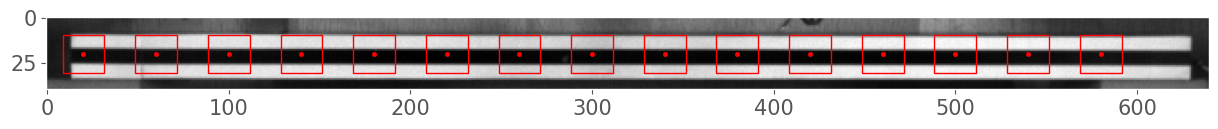

In [29]:
video.show_points()

Izrčaun pomikov:

In [30]:
#displacements_lk = video.get_displacements(processes=2) * 8e-5

In [31]:
displacements_lk = np.load('data/displacements_lk.npy')

In [32]:
točka = 1

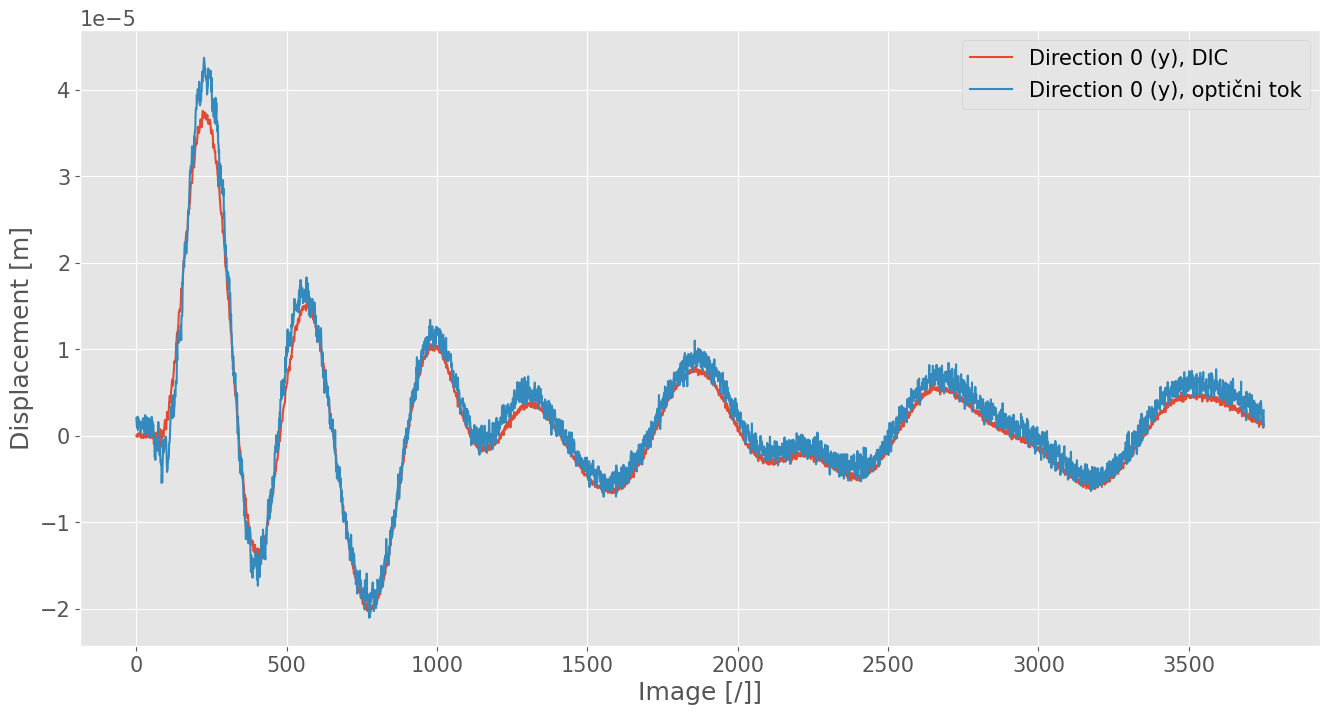

In [33]:
fig, ax = plt.subplots()
ax.plot(displacements_lk[3, :, 0], label='Direction 0 (y), DIC')
ax.plot(displacements[location, :, 0], label='Direction 0 (y), optični tok');
ax.set_xlabel('Image [/]]')
ax.set_ylabel('Displacement [m]')
plt.legend()

In [34]:
displacements = displacements_lk

## Izračun FRF

Izračun amplitudnih spektrov pomikov:

In [35]:
N = int(video.info['Total Frame'])
dt = 1/int(video.info['Record Rate(fps)'])
1/dt

15000.0

In [36]:
T = dt*N
T

0.25

In [37]:
upper_f_limit = 4000 # zgornja frekvenčna meja, ki nas zanima

In [38]:
freq_cam = np.fft.rfftfreq(N, dt)
fft_cam = np.fft.rfft(displacements[:, :, 0], N) * 2 / N 

Opazujemo le frekvence pod mejo `upper_f_limit` Hz:

In [39]:
fft_cam = np.copy(fft_cam[:, freq_cam<upper_f_limit])
freq_cam = np.copy(freq_cam[freq_cam<upper_f_limit])

Silo vzbujanja smo merili s silomerom.

Da lahko meritiv kombiniaramo, je pomembna **ujemajoča frekvenčna ločljivost**! Tudi tukaj se omejimo do `upper_f_limit`:

In [40]:
lvm = lvm_read.read(lvm_fname)
force = lvm[0]['data'][:-30, 1] # 30 predvzorcev
N = len(force)//4 # dolžina shranjenega videa je 0.25 s
dt = lvm[0]['Delta_X'][1]

fft_force = np.fft.rfft(force, N) *2/N
freq_force = np.fft.rfftfreq(N, dt)

fft_force = np.copy(fft_force[freq_force<upper_f_limit])
freq_force = np.copy(freq_force[freq_force<upper_f_limit])

Ker smo zajeli le en segment ne moremo uporabiti natančnejše cneilke FRF:

In [41]:
frf_cam = fft_cam/fft_force 

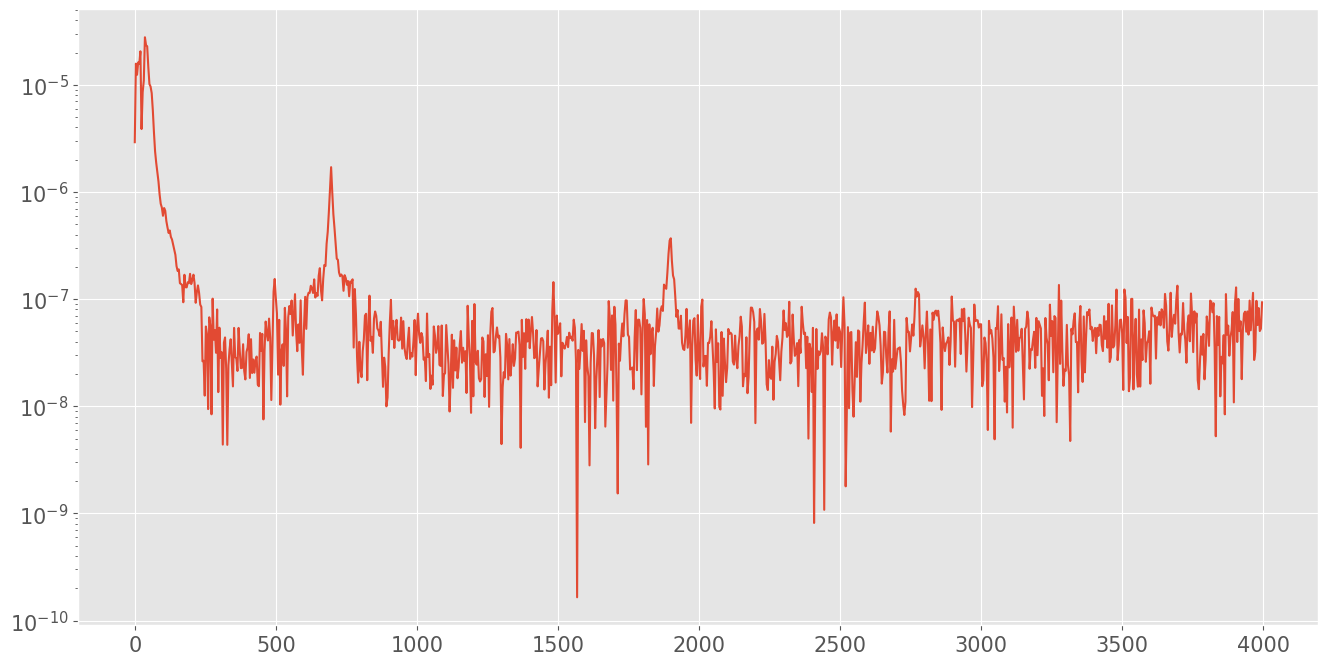

In [42]:
plt.semilogy(freq_cam, np.abs(frf_cam[točka]));

## Eskperimentalna modalna analiza (samo slikovna meritev):

Za eksperimentalno modalno analizo uporabimo paket [``pyEMA``][1].

[1]: https://pypi.org/project/pyEMA/

In [43]:
cam = pyEMA.Model(frf_cam, freq_cam, pol_order_high=75, upper=upper_f_limit)

Izračun polov modela frekvenčne prenosne funkcije:

In [44]:
cam.get_poles(show_progress=True)

100%|███████████████████████████████████████████████████████████████| 75/75 [00:01<00:00, 62.73it/s]


Izbrati moramo pole, ki se zdijo fizikalno smiselni (stabilni).

In [45]:
cam.select_poles()

  0%|                                                                        | 0/75 [00:00<?, ?it/s]d:\pedagoško\_Procesiranje signalov\_VAJE\_PREDLOGE\Predavanje 12 - Procesiranje slik\venv\Lib\site-packages\pyEMA\stabilization.py:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fn_temp[i, n - 1] = fn[i]
d:\pedagoško\_Procesiranje signalov\_VAJE\_PREDLOGE\Predavanje 12 - Procesiranje slik\venv\Lib\site-packages\pyEMA\stabilization.py:82: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xi_temp[i, n - 1] = xi[i]
100%|██████████████████████████████████████████████████████████████| 75/75 [00:00<00:00, 109.26it/s]
d:\pedagoško\_Procesiranje si

<Figure size 1600x800 with 0 Axes>

In [46]:
cam.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  695.6	0.0016
2) 1897.7	0.0004


Za rekonstrukcijo modela FRF uporabimo metodo LSFD:

In [47]:
frf_rec, shapes_cam = cam.get_constants(FRF_ind='all')

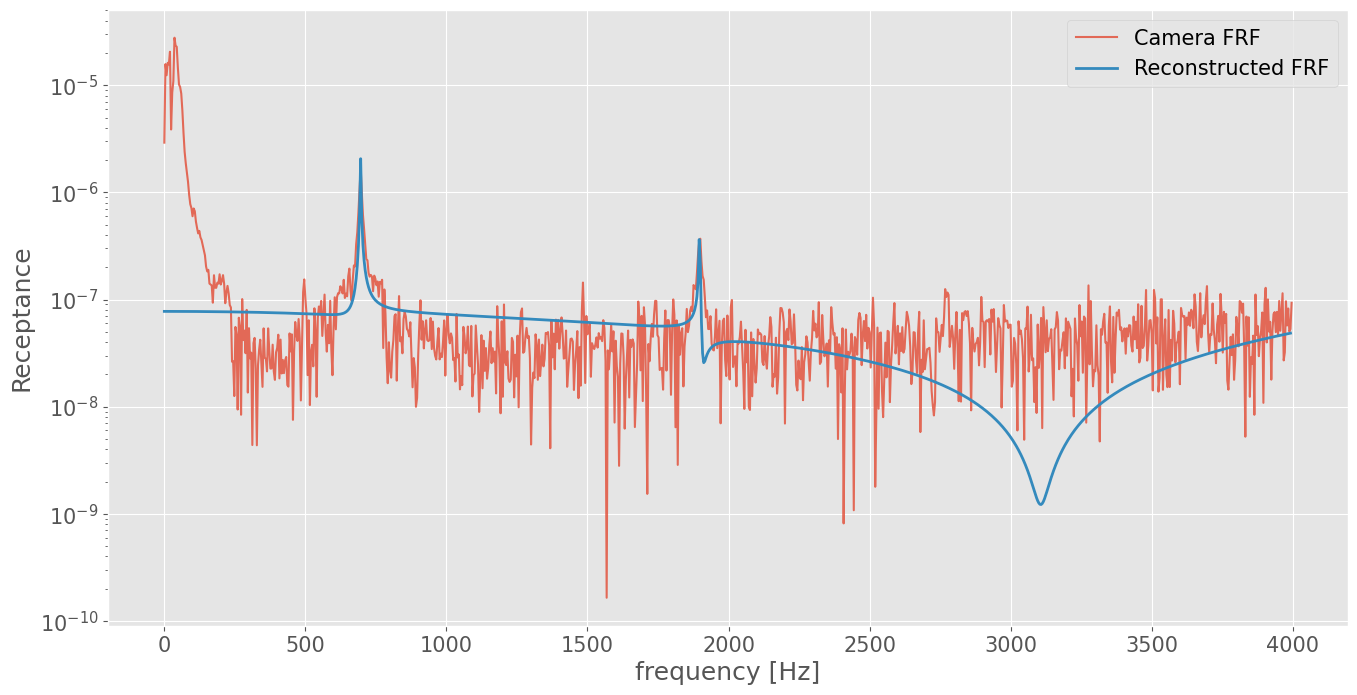

In [48]:
fig, ax = plt.subplots()
ax.semilogy(freq_cam, np.abs(frf_cam[točka]), label='Camera FRF', alpha=0.8)
ax.semilogy(freq_cam[:-1], np.abs(frf_rec[točka]), label='Reconstructed FRF', lw=2)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('Receptance')
plt.legend();

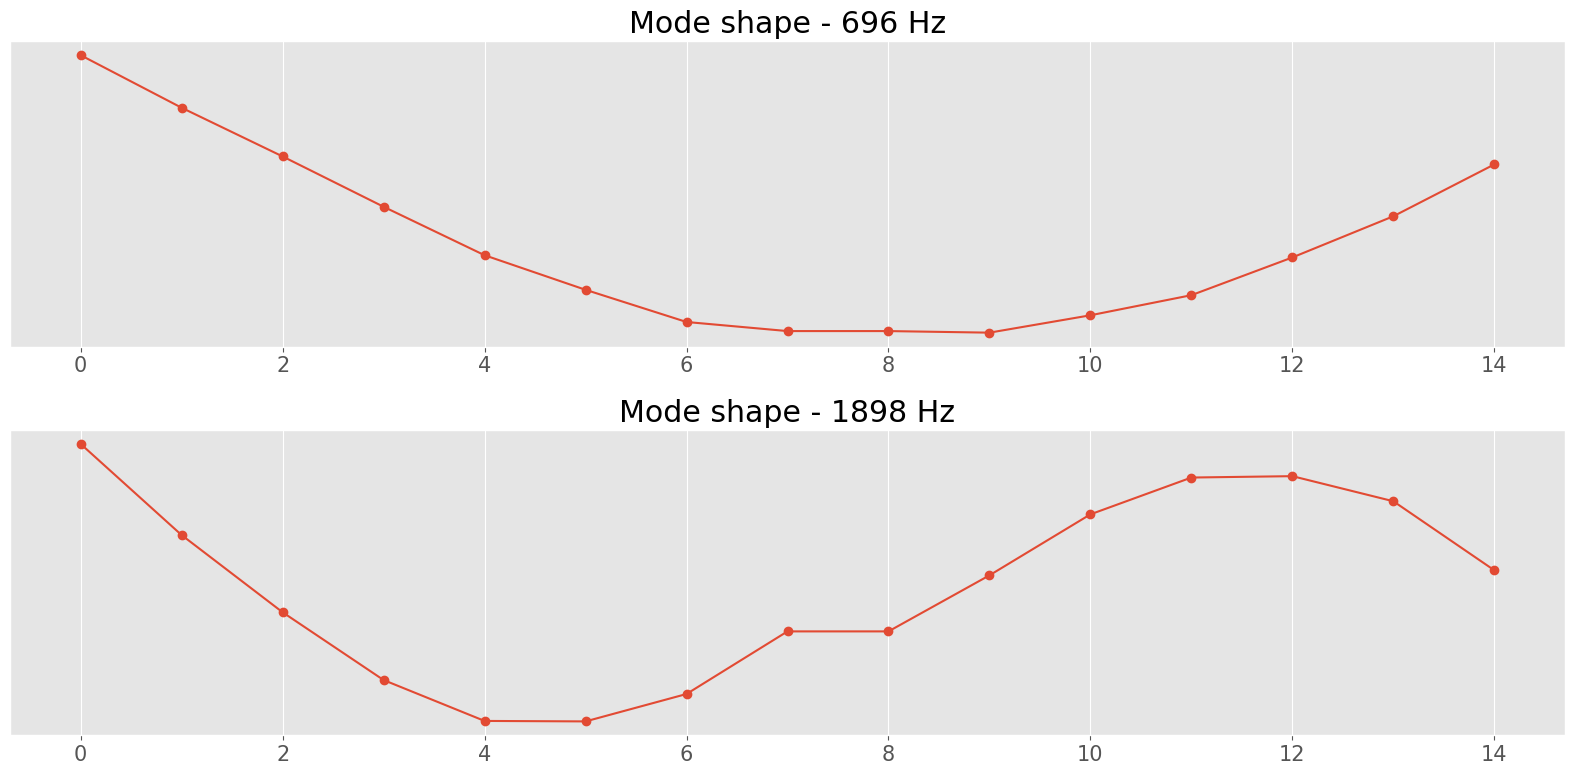

In [49]:
fig, ax = plt.subplots(shapes_cam.shape[1])
for i, a in enumerate(ax):
    plot_mode_shape(shapes_cam[:, i], axis=a, frequency=cam.nat_freq[i])

## Primerjava z meritivjo pospeškomera

Pri hibridni metodi kombiniramo pomike s slik z visoko prostorsko ločljivostjo in meritve pospeška z visoko natančnostjo:

In [50]:
hyb_acc = lvm[0]['data'][:-30, 0] * 9.81 # pospeškomer

Za oceno FRF lahk uporabimo paket [``pyFRF``][1]

[1]: https://pypi.org/project/pyFRF/

In [51]:
frf_ = pyFRF.FRF(
    sampling_freq=int(np.round(1/dt)),
    exc=force,
    resp=hyb_acc,
    exc_type='f',
    resp_type='a')

Opazujemo le frekvenčno območj do `upper_f_limit` Hz:

In [52]:
freq_acc = frf_.get_f_axis()
frf_acc = frf_.get_FRF(form='accelerance')[0, 0]

frf_acc = frf_acc[freq_acc<upper_f_limit]
freq_acc = freq_acc[freq_acc<upper_f_limit]

Pospeškomer je bil nameščen v točki z indeksom 3:

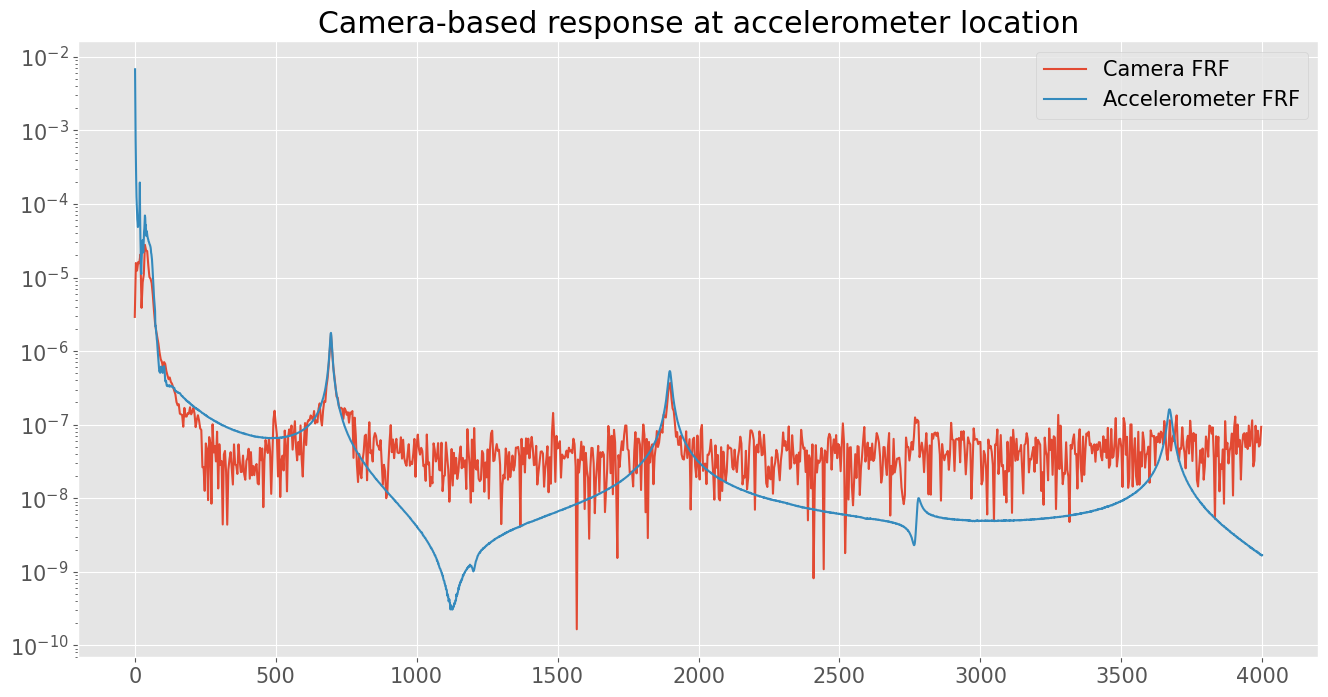

In [54]:
fig, ax = plt.subplots()
ax.semilogy(freq_cam, np.abs(frf_cam[točka]), label='Camera FRF')
ax.semilogy(freq_acc, np.abs(frf_acc / -(2*np.pi*freq_acc)**2), label='Accelerometer FRF')
ax.set_title('Camera-based response at accelerometer location')
plt.legend();